In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Bank Customer Churn Prediction.csv')
#df.dtypes
one_hot_country = pd.get_dummies(df.country, prefix='country')
one_hot_gender = pd.get_dummies(df.gender, prefix='gender')
df = df.drop(["country","gender"],axis=1)
df = pd.concat([df, one_hot_country, one_hot_gender], axis=1)

df = df.drop(['customer_id'], axis='columns')
X = df.drop(['churn'], axis='columns')
y = df['churn']
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.538     , 0.32432432, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , ..., 1.        , 1.        ,
        0.        ],
       [0.304     , 0.32432432, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.844     , 0.32432432, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.884     , 0.13513514, 0.4       , ..., 0.        , 1.        ,
        0.        ]])

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.labels_)
print(homogeneity_completeness_v_measure(y, kmeans.labels_))
print('Silhouette = ',silhouette_score(X,kmeans.labels_))


[1 1 1 ... 1 0 1]
(np.float64(0.011181640798330806), np.float64(0.00820390448875087), np.float64(0.00946407354330713))
Silhouette =  0.2551161655078475


In [3]:
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


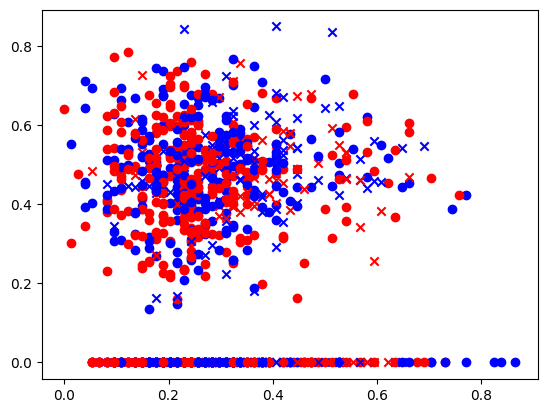

In [4]:
colors = np.array(['red', 'blue'])
markers = ['o', 'x']
for i in range(1000):
    plt.scatter(X[i,1], X[i,3], marker=markers[y[i]], color=colors[kmeans.labels_[i]])
plt.show()